In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
plt.rc('font', family='pretendard variable')

### Seaborn
[Seaborn graphs]



[Seaborn graphs]:https://seaborn.pydata.org/examples/index.html

In [ ]:
# seaborn 연습용 예제 데이터셋 불러오기
# 다이아몬드 데이터셋
diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
# 데이터가 너무 많으므로 샘플 데이터를 추출해 사용
# replace=False로 비복원추출로 600개의 표본 얻음
sample = diamonds.sample(600, replace=False) 
sample

,carat,cut,color,clarity,depth,table,price,x,y,z
6023,1.00,Good,D,SI2,64.3,60.0,3965,6.22,6.19,3.99
5770,1.13,Premium,E,SI2,62.5,57.0,3898,6.68,6.63,4.16
33592,0.37,Premium,G,VS2,60.1,59.0,833,4.68,4.64,2.80
39242,0.42,Premium,H,VVS1,62.0,58.0,1068,4.79,4.82,2.98
8723,0.31,Premium,H,VS2,58.9,61.0,586,4.46,4.43,2.62
...,...,...,...,...,...,...,...,...,...,...
1523,1.01,Fair,J,VVS2,66.0,56.0,2998,6.29,6.22,4.13
43778,0.37,Fair,D,IF,61.2,57.0,1440,4.68,4.73,2.88
6106,0.90,Good,G,VS1,64.5,57.0,3977,6.01,6.08,3.90
32379,0.39,Very Good,J,VS1,63.1,56.0,790,4.70,4.62,2.94


In [5]:
# cut이 어떤 카테고리 값들을 갖는지 보기
sample['cut'].unique()

['Good', 'Premium', 'Ideal', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [6]:
# seaborn 테마 설정
sns.set_theme(style='whitegrid',  # 전체 스타일 -> matplotlib에도 적용됨
               palette='summer') # 사용할 색 팔레트

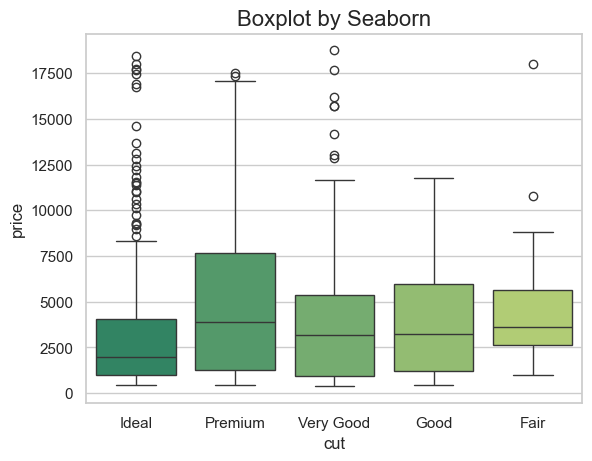

In [9]:
# cut 등급과 가격의 상관관계를 알기 위해 boxplot 그리기
ax = sns.boxplot(data=sample, # 사용할 데이터 선택
            x="cut",  # x축 = cut
            y="price", # y축 = price
            hue='cut', # 색 구분에 사용할 카테고리 지정
            flierprops={"marker": "o"} # 마커를 다이아몬드 모양으로 변경
            )
ax.set_title('Boxplot by Seaborn', fontsize=16)
# ax.grid(True, axis='y')
plt.show()


/var/folders/ny/6ntv7kt160x1lr71xh3s6vvc0000gn/T/ipykernel_9881/428575696.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = sample.groupby("cut")  # cut별 그룹화


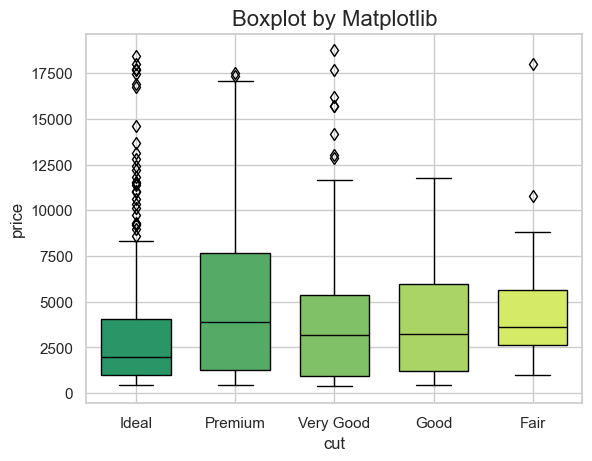

In [10]:
# 데이터 준비
groups = sample.groupby("cut")  # cut별 그룹화
group_names = groups.groups.keys()  # 그룹 이름 (cut 등급)
group_values = [group["price"] for _, group in groups]  # 각 cut 그룹의 price 값
palette = sns.color_palette("summer", len(group_names))

# Matplotlib로 Boxplot 그리기
fig, ax = plt.subplots()

for i, (values, color) in enumerate(zip(group_values, palette)):
    # 그룹별 박스플롯 생성
    ax.boxplot(
        values,
        widths=0.7,
        positions=[i + 1],  # 박스 위치 설정
        patch_artist=True,  # 색상 채우기 활성화
        boxprops={"facecolor": color, "edgecolor": "black"},  # 박스 스타일
        medianprops={"color": "black", "linewidth": 1},  # 중앙값 스타일
        flierprops={"marker": "d"},  # 이상치 스타일
        
    )

# x축 레이블 설정
ax.set_xticks(range(1, len(group_names) + 1))
ax.set_xticklabels(group_names)

# 제목과 축 라벨
ax.set_title("Boxplot by Matplotlib", fontsize=16)
ax.set_xlabel("cut")
ax.set_ylabel("price")

# 그래프 출력
plt.show()

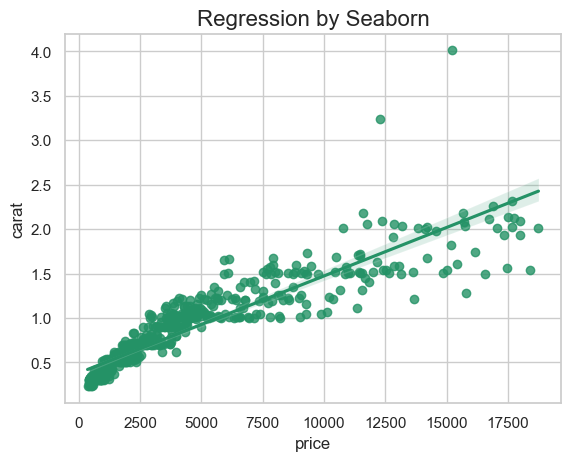

In [11]:
# 회귀 그래프 seaborn으로 그리기
ax = sns.regplot(data=sample, x="price", y="carat")
ax.set_title('Regression by Seaborn', fontsize=16)

plt.show()

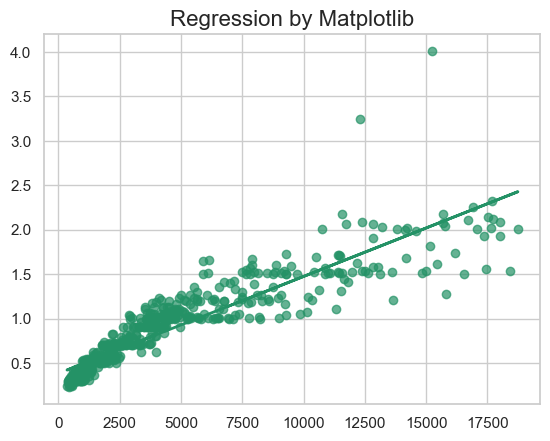

In [14]:
# 같은 회귀분석 그래프를 matplotlib으로 그리기
# seaborn 보다 matplotlib 그래프가 더 많은 코드를 필요로 함

plt.title('Regression by Matplotlib', fontsize=16)
x = sample['price']
y = sample['carat']

# 회귀선 구하기
poly = np.polyfit(x, y, 1)
y_pred = np.polyval(poly, x)

plt.scatter(data=sample, x='price', y='carat', alpha=0.7) # 산점도 그리기
plt.plot(x, y_pred, linewidth=2) # 추세선 그리기

plt.show()

In [15]:
# matplotlib과 seaborn 비교
# heatmap 만들기

flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [16]:
# flights 데이터로 heatmap 만들기
# pivot table만들기
df = flights.pivot(index="month", columns="year",values="passengers")
df


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


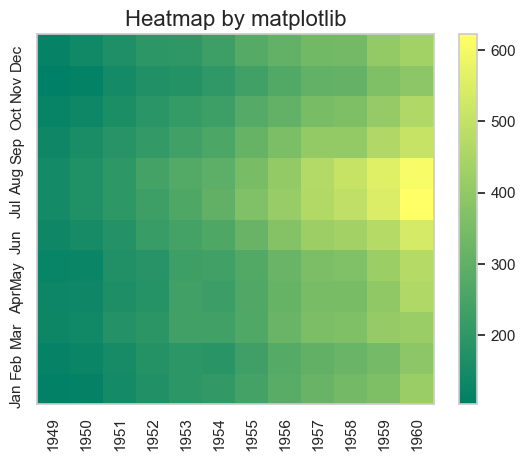

In [17]:
plt.pcolor(df, cmap='summer')
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, rotation=90)
plt.title('Heatmap by matplotlib', fontsize=16)
plt.colorbar()

plt.show()

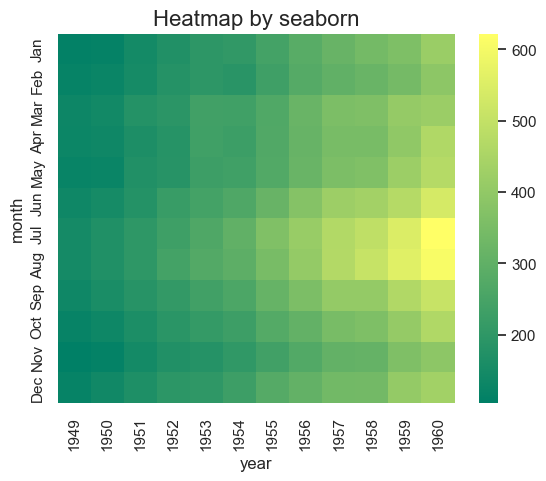

In [18]:
sns.heatmap(df, cmap='summer')
plt.title('Heatmap by seaborn', fontsize=16)
plt.show()

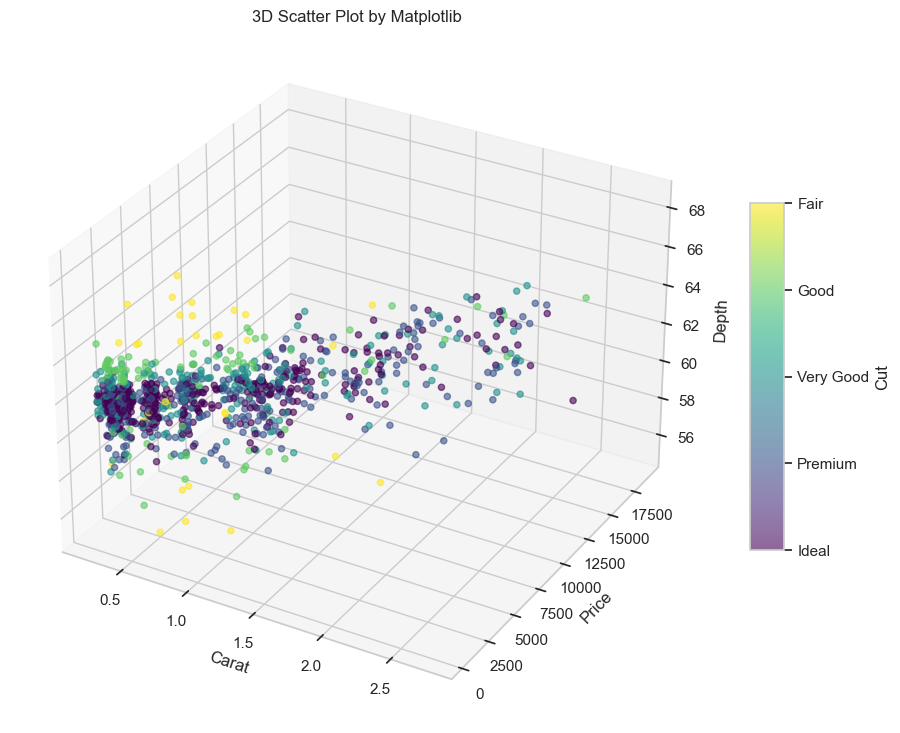

In [20]:
# 데이터 샘플링 (데이터 샘플 개수 1000개로 선택)
diamonds_sample = diamonds.sample(1000, random_state=42)

# 3D 산점도
fig = plt.figure(figsize=(12, 9)) # 플롯 사이즈
ax = fig.add_subplot(111, projection='3d') # 1행 1열 위치 1 + 3d그래프로 구성

# 축 설정 (carat, price, depth를 사용)
x = diamonds_sample['carat']  # x축 몇 캐럿인지
y = diamonds_sample['price']  # y축 다이아몬드의 가격
z = diamonds_sample['depth']  # z축 다이아몬드의 깊이(두께)
c = diamonds_sample['cut'].astype('category').cat.codes  # 색상 (cut 기준) 범주형 데이터여서 숫자로 변경해서 사용

# 3D 산점도 그리기
sc = ax.scatter(x, y, z, c=c, cmap='viridis', s=20, alpha=0.6)
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_zlabel('Depth')
ax.set_title('3D Scatter Plot by Matplotlib')

# 컬러바 추가
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Cut')

# 컬러바의 틱 레이블을 범주형 데이터로 변경
cut_categories = diamonds_sample['cut'].astype('category').cat.categories
cbar.set_ticks(range(len(cut_categories)))
cbar.set_ticklabels(cut_categories)

plt.show()